# Diabetes Prediciton Classifier

#### Eva Ulrichsen, Hannah Horn
##### CPSC 322, Fall 2024

## Introduction

**Dataset Description:**
This dataset originated from Kaggle and is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative).

The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

`Classification Task:` We will use these various attributes to predict if a patient will be diagnosed with diabetes.

TODO: briefly describe your findings (e.g. what classifier approach perfomred the best.) -- note this is before we've implemented random forest so a bit tbd

**Findings**
The classifier that performed the best was the Naive Bayes Classifier. 

## Data Analysis

In [8]:
import importlib
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

import mysklearn.utils
importlib.reload(mysklearn.utils)
import mysklearn.plot_utils as plot_utils
importlib.reload(mysklearn.plot_utils)

pre_diabetes_dataset = MyPyTable()
pre_diabetes_dataset.load_from_file("output_data/cleaned_diabetes_data.csv")

pre_diabetes_dataset.random_subsample_classes("output_data/diabetes_minimize.csv", "diabetes", 1000)

diabetes_dataset = MyPyTable()
diabetes_dataset.load_from_file("output_data/diabetes_minimize.csv")

diabetes_headers = diabetes_dataset.column_names
diabetes_data = diabetes_dataset.data

**Details about Dataset:**
Attribute & Attribute Types
- `Gender (categorical):` the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other.
- `Age (continuous):` Age is an important factor as diabetes, especially Type 2, is more commonly diagnosed in older adults. The data ranges from 0.08 - 80. 
- `Hypertension (categorical):` a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.
- `Heart Disease (categorical):` another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.
- `Smoking History (categorical):` considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 4 categories i.e not current,former,current,never and ever.
- `Body Mass Index (continuous):` measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55.
- `Hemoglobin A1c (continuous):` measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. The range of A1c is from 3.5 to 0. 
- `Blood Glucose level (continuous):` amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes. the range is from 80 to 300. 

**Data Cleaning**
Our original dataset was ~100,000 instances which after removing the rows that had no info for the smoking attribute we had ~64,000 instances. Since we weren't able to efficiently load this in our Jupyter Notebook, we randomly downsampled to include 1000 instances for the no diabetes class and 1000 instances for the diabetes class. 

**This is the summary statistics for the diabetes instances of our dataset:**

In [9]:
print("Diabetes instances statistics")
print("------------------------------")

diabetes_dataset.save_to_file_condition("output_data/diabetes_minimize.csv", "diabetes", 1)
positive_diabetes = MyPyTable()
positive_diabetes.load_from_file("output_data/positive_diabetes.csv")

column_names = ["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level"]
pos_stats = positive_diabetes.compute_summary_statistics(column_names)
pos_stats.pretty_print()

Diabetes instances statistics
------------------------------
attribute               min     max      mid       avg    median
-------------------  ------  ------  -------  --------  --------
age                   13      80      46.5     60.715      62.5
hypertension           0       1       0.5      0.243       0
heart_disease          0       1       0.5      0.152       0
bmi                   13.73   79.46   46.595   32.1371     30.18
HbA1c_level            5.7     9       7.35     6.9945      6.6
blood_glucose_level  126     300     213      191.309     160


**This is the summary statistics for the non diabetes instances of our dataset:**

In [10]:
print("Non-Diabetes instances statisitcs")
print("------------------------------")

diabetes_dataset.save_to_file_condition("output_data/diabetes_minimize.csv", "diabetes", 0)
negative_diabetes = MyPyTable()
negative_diabetes.load_from_file("output_data/negative_diabetes.csv")

neg_stats = negative_diabetes.compute_summary_statistics(column_names)
neg_stats.pretty_print()

Non-Diabetes instances statisitcs
------------------------------
attribute              min     max     mid       avg    median
-------------------  -----  ------  ------  --------  --------
age                   0.24   80      40.12   45.2167     46
hypertension          0       1       0.5     0.085       0
heart_disease         0       1       0.5     0.041       0
bmi                  13.8    57.16   35.48   28.4016     27.32
HbA1c_level           3.5     6.6     5.05    5.4141      5.8
blood_glucose_level  80     200     140     132.324     140


note: interpretation of the summary statistics here??

**Data Visualizations**

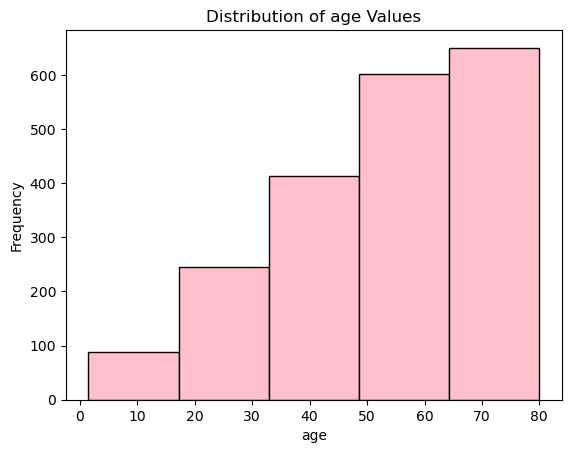

Figure 1. This figure is a histogram of the age attribute


In [11]:
plot_utils.basic_histogram(diabetes_data, diabetes_headers, "age", 5)
print("Figure 1. This figure is a histogram of the age attribute")

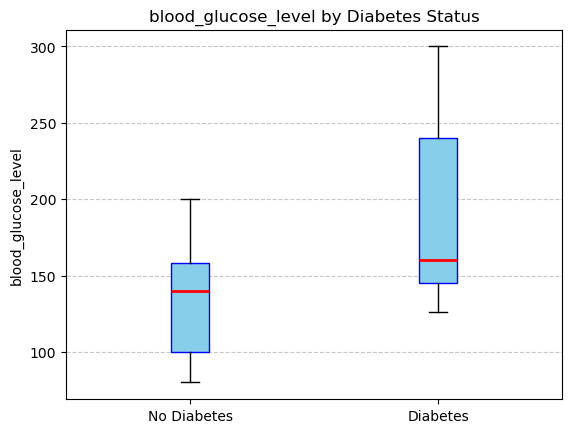

Figure 2. This figure is a boxplot that compares the blood glucose levels between diabetics and non-diabetics


In [12]:
plot_utils.continuous_box_plt(diabetes_data, diabetes_headers, "blood_glucose_level")
print("Figure 2. This figure is a boxplot that compares the blood glucose levels between diabetics and non-diabetics")

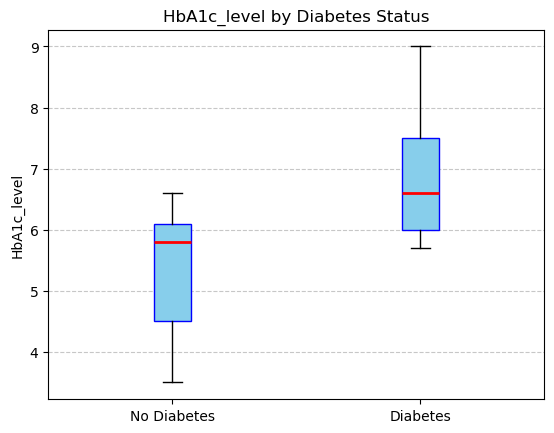

Figure 3. This figure shows a comparative box plot of A1c level of diabetics vs. non-diabetics


In [13]:
plot_utils.continuous_box_plt(diabetes_data, diabetes_headers, "HbA1c_level")
print("Figure 3. This figure shows a comparative box plot of A1c level of diabetics vs. non-diabetics")

The above EDA highlights some of the more interesting and important aspects of this dataset. For example, in our summary statistics, we can see that the **average A1c level for diabetics was 6.99 compared to 5.41 for non diabetics**. Additionally, we can see that the **average blood glucose of diabetics was 191 compared to 132 for non diabetics**. Through the summary statistics, we were able to determine where there were discrepencies between the two groups and from that, determine which attributes would be good to use in our classifier. 

Additionally, Figure 1 shows that the distribution of age in our dataset is skewed to the left indicating that there is a older population in our dataset. In Figure 2, we can see that the median blood glucose level is higher in diabetics than non diabetics, additionally the ...

## Classification Results

For our classification approach, we developed and implemented 5 different classifiers:
- KNN Classifier
- Dummy Classifier
- Naive Bayes Classifier
- Decision Tree Classifier
- Random Forest Classifier

We implmemented fit and predict methods for the above classifiers and created unit tests to test if the classifier was working as predicted.

Since we wanted to combine multiple attributes, both categorical and numeric, into our classifier, we had to prepare our data which involved getting the relevant columns, randomizing when necessary, and combining into a single X_train and y_train. 

We then used the X, y as well as the initialized classifier and performed a 10 Fold Cross Evaluation. 

In order to properly evaluate and compare each classifier's performance, we displayed the following metrics:
- accuracy & error rate
- precision
- recall
- f1 score

While the KNN had a 0.85 accuracy score and 0.85 f1 score, `naive bayes had a 0.89 f1 score and accuracy and was the best of all our classifiers.`

## Classification Web App

we have this running but idk what exactly we put in the report?

## Conclusion

Overall this project used a diabetes dataset from Kaggle containing many attributes that could be used to predict whether someone had diabetes or not. One of its inherent challenges was that there was a **severe class imbalance** of the number of diabetics versus non diabetics so as a result we had to randomly downsample our data to get an equal number of instances of each class. Another challenge has to do with the interpretation of the classification outcome. Since our dataset **doesn't distinguish between Type 1 or Type 2 diabetics**, we cannot make accurate conclusions if a patient is classified as a diabetic. 

We used the `Naive Bayes` Classifier in our classification which performed well with a 89% accuracy score. 

# Acknowledgments